In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../../datasets/DigitRecognizer/train.csv')
df.shape

(42000, 785)

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df['label']
X = df.drop('label',axis=1)

In [5]:
X.shape

(42000, 784)

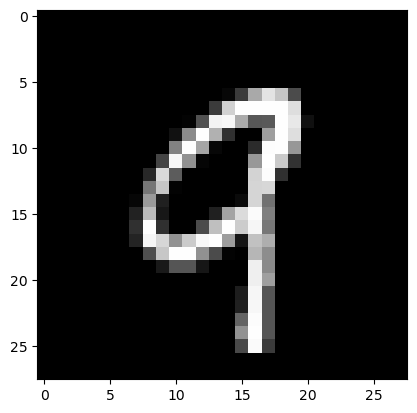

In [6]:
img = X.iloc[-1].values.reshape(28,28)
plt.imshow(img,cmap='gray')

In [7]:
# Scaling
X_scaled = X/255

In [8]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [9]:
from tensorflow.keras.utils import to_categorical
ya = to_categorical(y,10)

In [10]:
ya

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(42000, 10))

In [11]:
X_scaled.shape

(42000, 784)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(16,activation = 'relu',input_shape=(784,)))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_scaled,ya,epochs=10,batch_size=64)

C:\Users\Pratik\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8203 - loss: 0.6366
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9121 - loss: 0.3031
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9259 - loss: 0.2549
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9348 - loss: 0.2275
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9401 - loss: 0.2079
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9438 - loss: 0.1936
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9458 - loss: 0.1832
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9494 - loss: 0.1744
Epoch 9/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9508 - loss: 0.1668
Epoch 10/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9536 - loss: 0.1608


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,006 (101.59 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,004 (50.80 KB)

In [20]:
# make predictions
import cv2,os

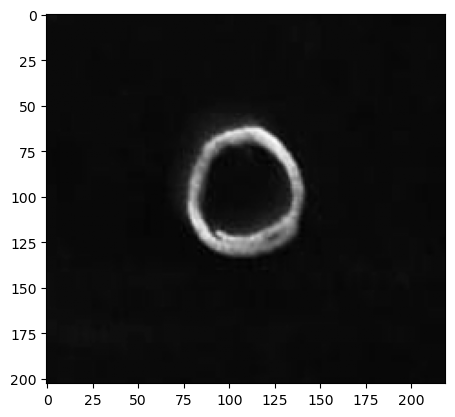

In [21]:
img = cv2.imread('../../../datasets/DigitRecognizer/my_images/0.png',0)
img_inverted = cv2.bitwise_not(img)

plt.imshow(img_inverted, cmap='gray')
plt.show()

In [22]:
def predict_digit(filename):
    img = cv2.imread('../../../datasets/DigitRecognizer/my_images/'+filename,0)
    img_inverted = cv2.bitwise_not(img)
    img = cv2.resize(img_inverted,(28,28))
    img = img/255
    img = img.reshape(1,784)
    yp = model.predict_on_batch(img).argmax()
    return yp

In [23]:
filenames = os.listdir('../../../datasets/DigitRecognizer/my_images/')
filenames

['0.png',
 '1.png',
 '2.png',
 '3.png',
 '4.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png']

In [24]:
for file in filenames[0:]:
    op = predict_digit(file)
    print(op,file)

5 0.png
5 1.png
5 2.png
3 3.png
4 4.png
5 5.png
5 6.png
3 7.png
5 8.png
5 9.png


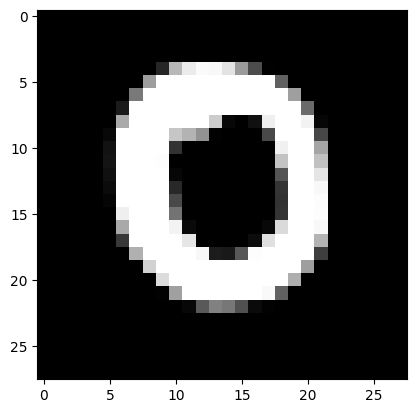

In [26]:
plt.imshow(img,cmap='gray')